# DBSCAN
## What is DBSCAN
> <U>Density-based spatial clustering of applications with noise</U> (DBSCAN) is a data clustering algorithm proposed by Martin Ester, Hans-Peter Kriegel, Jörg Sander and Xiaowei Xu in 1996.[1] It is a **density-based** clustering non-parametric algorithm: given a set of points in some space, it groups together points that are closely packed together (points with many nearby neighbors), marking as outliers points that lie alone in low-density regions (whose nearest neighbors are too far away). DBSCAN is one of the most common, and most commonly cited, clustering algorithms.


In [10]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
import hdbscan
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/Users/namgyulee/s1.csv')

In [3]:
eps_values = np.arange(20400, 20551, 10)
cluster_nums = {}
cluster_plots = {}
best_epsilon = None
best_num_clusters = float('inf')
minPts = 4

DBSCAN requires to specify the minimum number of points.

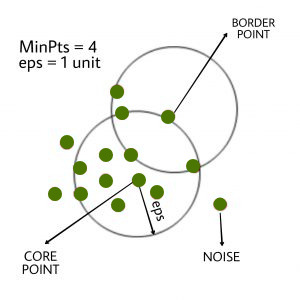

**eps** : $\epsilon$, defines the neighborhood around a data point. If the distance between two data points is lower than or eaqual to 'eps', then they are considered neighbors. If the eps value is chosen too small then a large part of the data will be considered as an outlier. If it is chosen very large then the clusters will merge and the majority of the data points will be in the same clusters.
 
**minPts** : Minimum number of neighbors (data points) within eps radius. The larger the dataset, the larger value of MinPts must be chosen. As a general rule, the minimum MinPts can be derived from the number of dimensions D in the dataset as, MinPts >= D+1. But it should be at least 3.


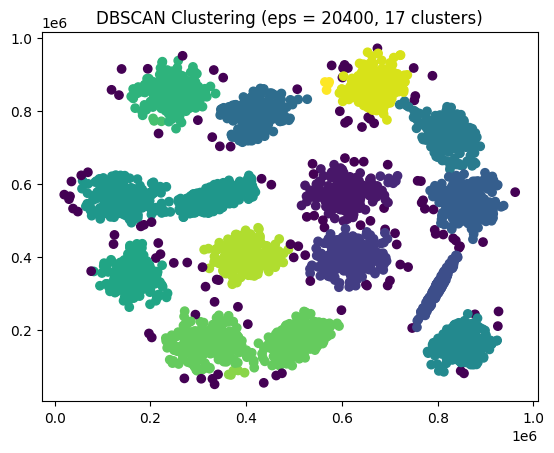

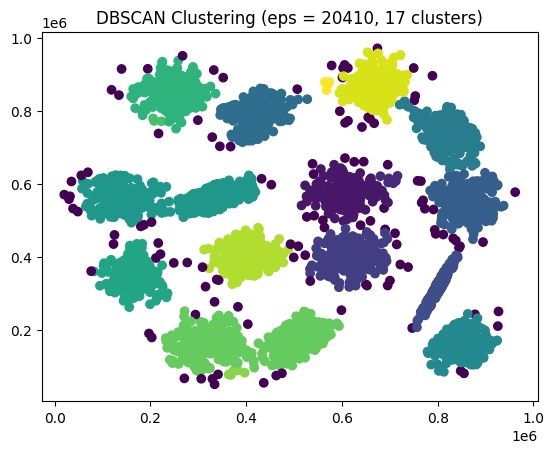

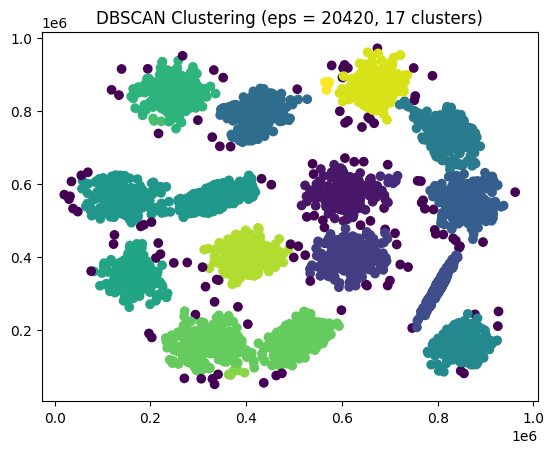

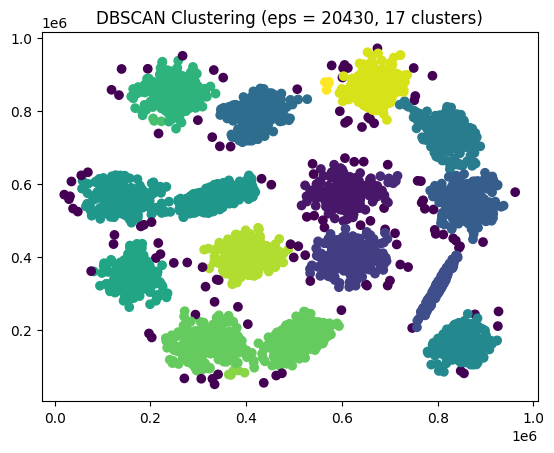

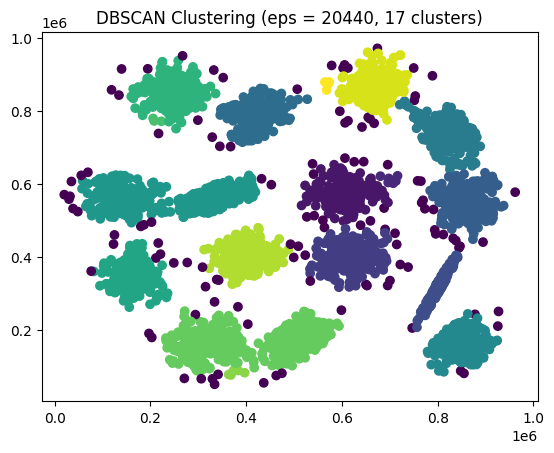

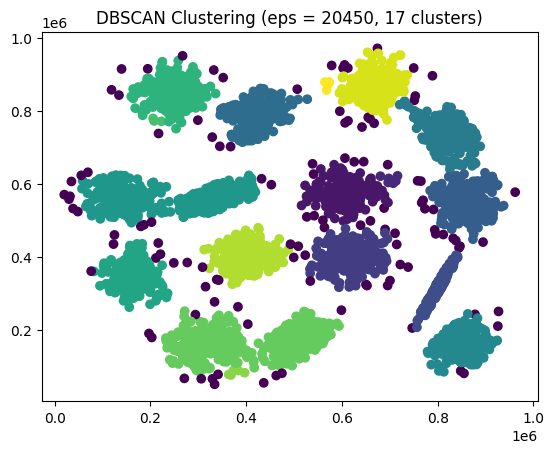

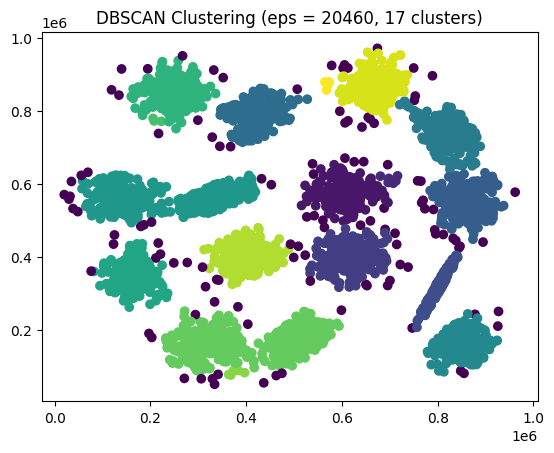

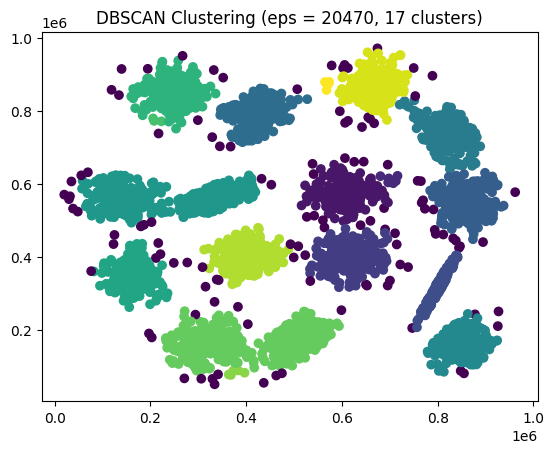

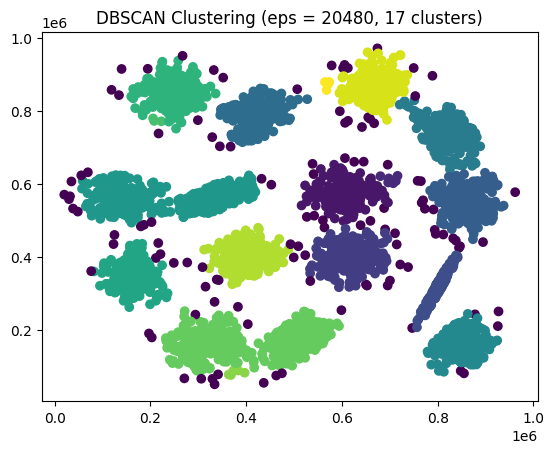

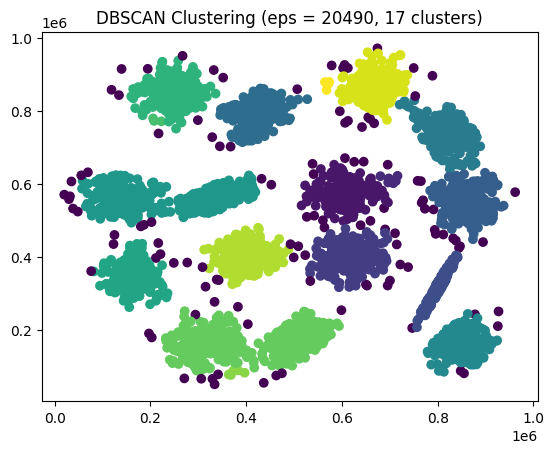

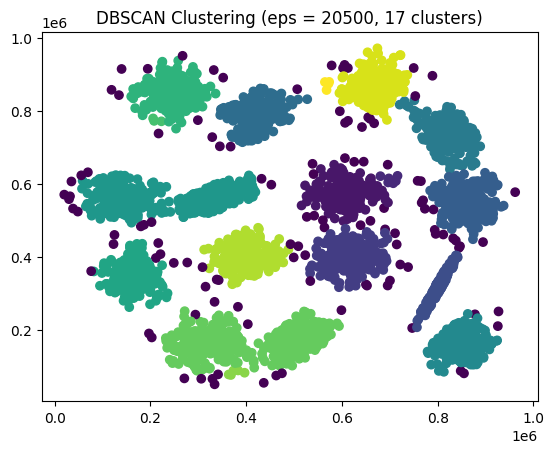

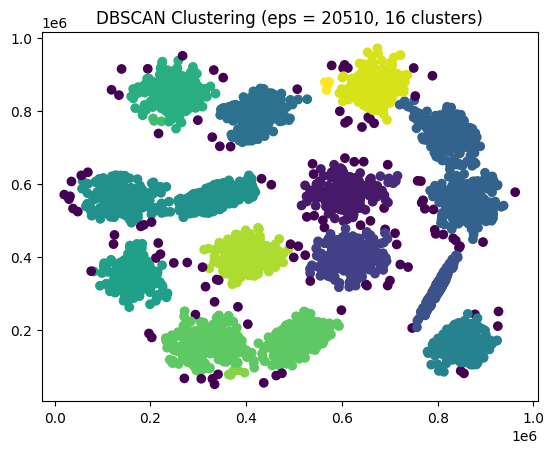

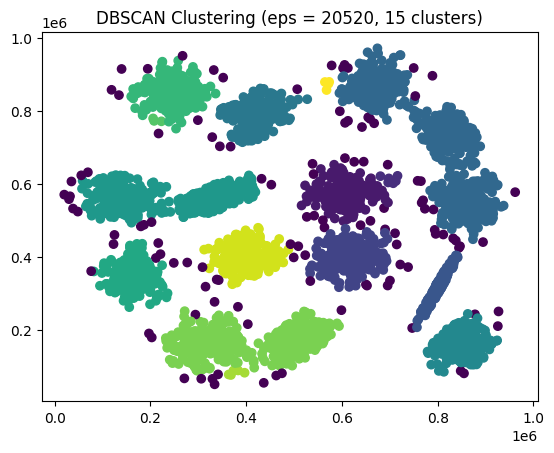

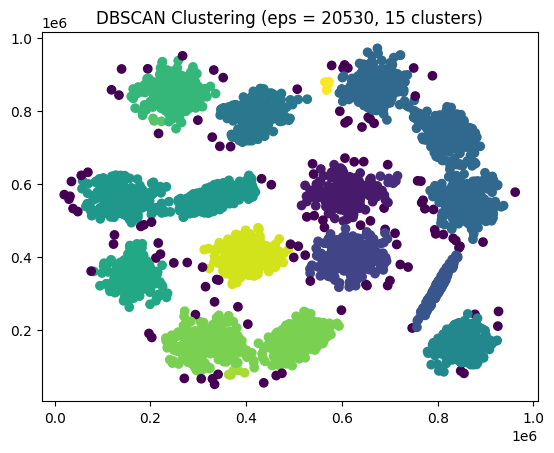

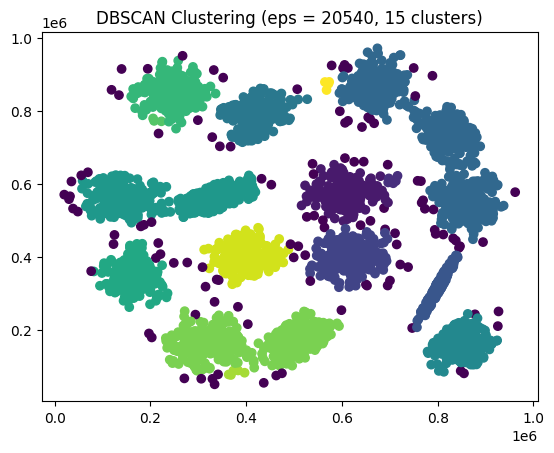

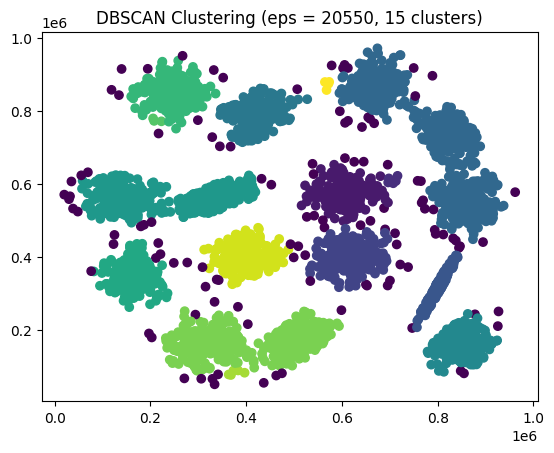

In [6]:
for eps in eps_values:
    dbscan_results = DBSCAN(eps=eps, min_samples=minPts).fit(df)
    unique_clusters = np.unique(dbscan_results.labels_[dbscan_results.labels_ != -1])
    num_clusters = len(unique_clusters)
    
    cluster_nums[eps] = num_clusters
    plt.figure()
    plt.scatter(df.values[:, 0], df.values[:, 1], c=dbscan_results.labels_, cmap='viridis')
    plt.title(f'DBSCAN Clustering (eps = {eps}, {num_clusters} clusters)')
    cluster_plots[eps] = plt
    
    if num_clusters == 16 and num_clusters < best_num_clusters:
        best_epsilon = eps
        best_num_clusters = num_clusters

In [7]:
print(f"At minPts = {minPts}, eps = {best_epsilon}, there are {best_num_clusters} clusters")

At minPts = 4, eps = 20510, there are 16 clusters


# HDBSCAN
HDBSCAN - Hierarchical Density-Based Spatial Clustering of Applications with Noise
  
HDBSCAN overcomes the limitation of DBSCAN, specifying eps and minPts.
Performs DBSCAN over varying epsilon values and integrates the result to find a clustering that gives the best stability over epsilon. This allows HDBSCAN to find clusters of varying densities (unlike DBSCAN), and be more robust to parameter selection.

At min_cluster_size = 16, there are 15 clusters


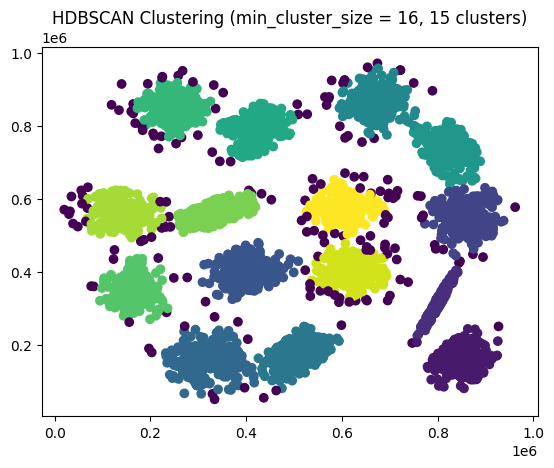

In [13]:
cluster_plots = {}
min_cluster_size = 16 # Optional, default = 5

clusterer = hdbscan.HDBSCAN(min_cluster_size=min_cluster_size)
clusterer.fit(df.values) 

num_clusters = len(np.unique(clusterer.labels_)) - 1
cluster_plots[min_cluster_size] = plt.scatter(df.values[:, 0], df.values[:, 1], c=clusterer.labels_, cmap='viridis')
plt.title(f'HDBSCAN Clustering (min_cluster_size = {min_cluster_size}, {num_clusters} clusters)')

print(f"At min_cluster_size = {min_cluster_size}, there are {num_clusters} clusters")